In [15]:
# Stefen Sutandi
# 13222091
# Tugas Besar 2 EL2004 Probabilitas dan Statistika

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import scipy.stats as st
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

# Membaca data dari file Excel
data = pd.read_excel('13222091.xlsx')

In [17]:
# 1. Lakukan preliminary analysis pada dataset sampel yang Anda dapatkan untuk menjawab pertanyaan berikut:
print('1.Lakukan preliminary analysis pada dataset sampel yang Anda dapatkan untuk menjawab pertanyaan berikut:')

# Menampilkan dimensi dataset (jumlah baris dan kolom)
rows, columns = data.shape
print(f"a. Dimensi dataset adalah sebagai berikut.")
print(f"Jumlah baris: {rows}")
print(f"Jumlah kolom: {columns}")

# Menghitung jumlah missing value per kolom
missing_values = data.isnull().sum()
print("\nb. Jumlah missing value per kolom:")
print(missing_values)

1.Lakukan preliminary analysis pada dataset sampel yang Anda dapatkan untuk menjawab pertanyaan berikut:
a. Dimensi dataset adalah sebagai berikut.
Jumlah baris: 285
Jumlah kolom: 150

b. Jumlah missing value per kolom:
Jenis Kelamin                 0
Usia                          0
Pendidikan Terakhir           0
Pekerjaan                     0
Penghasilan per Bulan         0
                           ... 
keluhan_belanja_online_2    202
keluhan_belanja_online_3    201
keluhan_belanja_online_4    230
keluhan_belanja_online_5    251
keluhan_belanja_online_6    272
Length: 150, dtype: int64


In [18]:
frekuensi_nilai = data['Jenis Kelamin'].value_counts()  # Ganti 'Nama_Kolom' dengan nama kolom yang ingin Anda hitung frekuensinya
print("Frekuensi nilai dalam kolom jenis kelamin:")
print(frekuensi_nilai)
print()
frekuensi_nilai = data['Penghasilan per Bulan'].value_counts()  # Ganti 'Nama_Kolom' dengan nama kolom yang ingin Anda hitung frekuensinya
print("Frekuensi nilai dalam kolom penghasilan per bulan:")
print(frekuensi_nilai)
print()
frekuensi_nilai = data['Durasi Penggunaan Internet per Hari (dalam Jam)'].value_counts()  # Ganti 'Nama_Kolom' dengan nama kolom yang ingin Anda hitung frekuensinya
print("Frekuensi nilai dalam kolom penggunaan internet:")
print(frekuensi_nilai)
print()
frekuensi_nilai = data['Domisili'].value_counts()  # Ganti 'Nama_Kolom' dengan nama kolom yang ingin Anda hitung frekuensinya
print("Frekuensi nilai dalam Domisili")
print(frekuensi_nilai)

Frekuensi nilai dalam kolom jenis kelamin:
Jenis Kelamin
Wanita    147
Pria      138
Name: count, dtype: int64

Frekuensi nilai dalam kolom penghasilan per bulan:
Penghasilan per Bulan
< Rp 2 juta               133
Rp 2 juta – Rp 5 juta      61
> Rp 10 juta               55
Rp 5 juta – Rp 10 juta     36
Name: count, dtype: int64

Frekuensi nilai dalam kolom penggunaan internet:
Durasi Penggunaan Internet per Hari (dalam Jam)
800%     35
1200%    30
1000%    23
500%     20
600%     18
400%     15
1500%    12
300%     10
700%      8
2400%     4
900%      4
1400%     4
200%      4
1800%     4
1600%     3
1900%     2
1700%     2
2000%     2
2100%     1
2200%     1
Name: count, dtype: int64

Frekuensi nilai dalam Domisili
Domisili
Jakarta              77
Bandung              74
Tangerang            18
Depok                10
Surabaya              9
Medan                 9
Yogyakarta            8
Semarang              8
Bogor                 7
Malang                6
Bekasi                6


In [19]:
# Mengeset warna untuk visualisasi
sns.set(style='darkgrid')
palette_color = sns.color_palette('Spectral')

C:\Users\stefe\AppData\Local\Temp\ipykernel_30776\2646898090.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, y='Usia', palette='pastel')


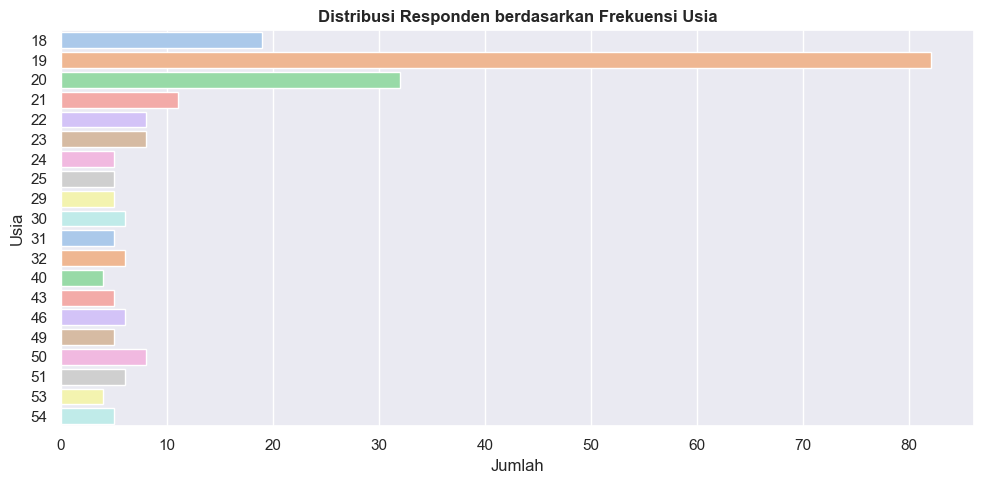

C:\Users\stefe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3370: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


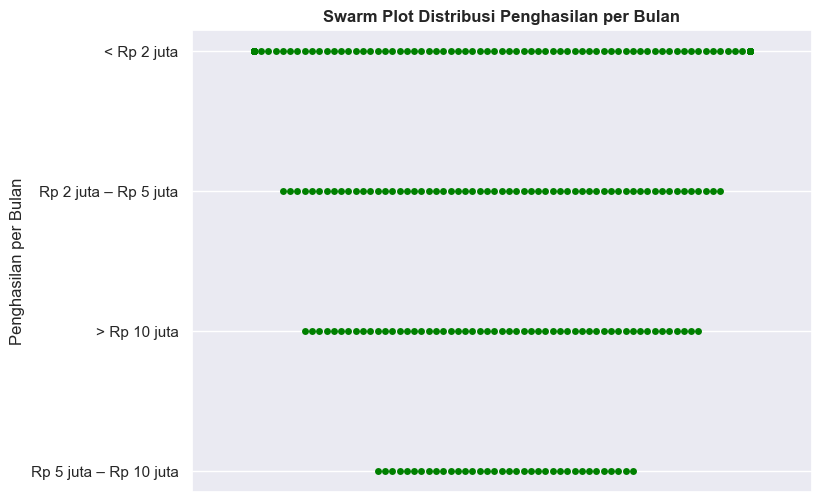

C:\Users\stefe\AppData\Local\Temp\ipykernel_30776\2646898090.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_count.values, y=gender_count.index, palette='pastel')


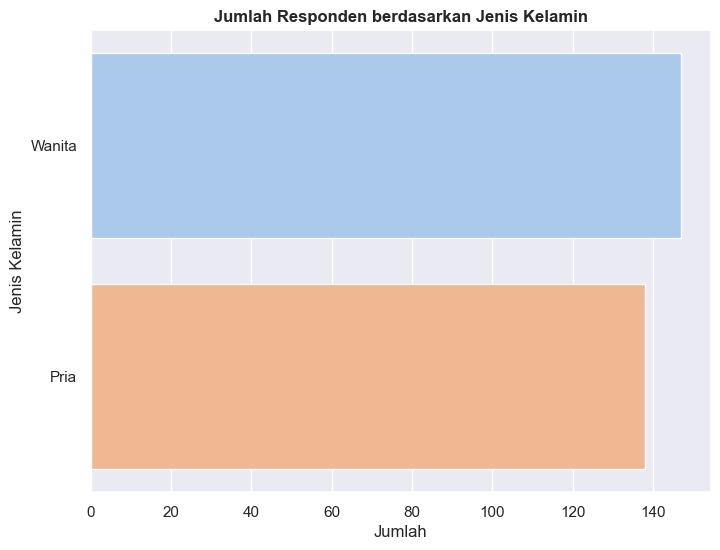

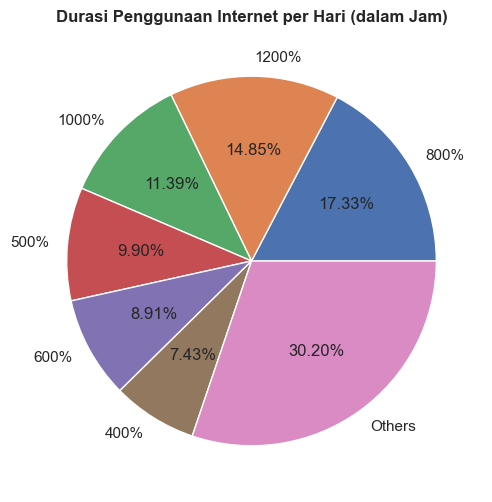

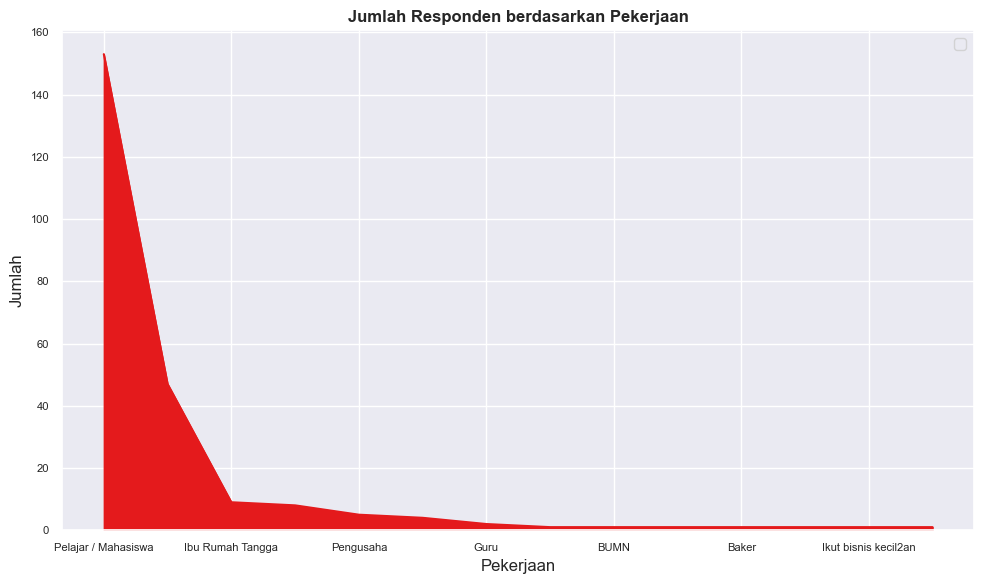

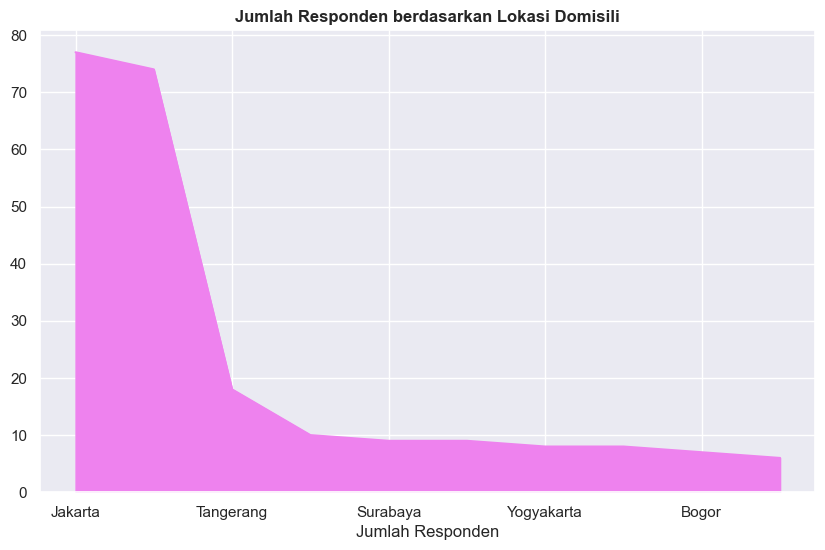

In [20]:
# 2. Buat 6 visualisasi (dengan tipe chart berbeda) dari dataset yang didapatkan.

# a. Visualisasi data Jumlah Responden berdasarkan Frekuensi Usia
top_occupations = data['Usia'].value_counts().head(20).index.tolist()
filtered_data = data[data['Usia'].isin(top_occupations)]
plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_data, y='Usia', palette='pastel')
plt.xlabel('Jumlah')
plt.ylabel('Usia')
plt.title('Distribusi Responden berdasarkan Frekuensi Usia', fontweight='bold')
plt.tight_layout()
plt.show()

# b. Visualisasi data Jumlah Responden berdasarkan Penghasilan per Bulan
plt.figure(figsize=(8, 6))
sns.swarmplot(y=data['Penghasilan per Bulan'], color='green')
plt.ylabel('Penghasilan per Bulan')
plt.title('Swarm Plot Distribusi Penghasilan per Bulan', fontweight='bold')
plt.show()

# c. Visualisasi data Jumlah Responden berdasarkan Jenis Kelamin
gender_count = data['Jenis Kelamin'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_count.values, y=gender_count.index, palette='pastel')
plt.xlabel('Jumlah')
plt.ylabel('Jenis Kelamin')
plt.title('Jumlah Responden berdasarkan Jenis Kelamin', fontweight='bold')
plt.show()

# d. Visualisasi data Persentase Penggunaan Layanan Aktif
usage_counts = data['Durasi Penggunaan Internet per Hari (dalam Jam)'].value_counts().sort_values(ascending=False)
top_6 = usage_counts.head(6)
others = pd.Series(usage_counts.iloc[6:].sum(), index=['Others'])
combined = pd.concat([top_6, others])
plt.figure(figsize=(8, 6))
combined.plot(kind='pie', autopct='%.2f%%')
plt.title('Durasi Penggunaan Internet per Hari (dalam Jam)', fontweight='bold')
plt.ylabel('')
plt.show()

# e. Visualisasi data Jumlah Responden berdasarkan Pekerjaan
plt.figure(figsize=(10, 6))
job_counts = filtered_data['Pekerjaan'].value_counts()
job_counts.plot(kind='area', colormap='Set1', fontsize = 8)
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah')
plt.title('Jumlah Responden berdasarkan Pekerjaan', fontweight='bold')
plt.legend('')
plt.tight_layout()
plt.show()

# f. Visualisasi data Jumlah Responden berdasarkan Lokasi Domisili
top_locations = data['Domisili'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_locations.plot(kind='area', color='violet')
plt.xlabel('Jumlah Responden')
plt.title('Jumlah Responden berdasarkan Lokasi Domisili', fontweight='bold')
plt.show()

In [21]:
# 3. a. Confidence interval 95% for one-sample proportion

# Memilih kolom dari dataset
CI1 = data['Aktivitas Online Meningkat']
CI2 = data['layanan_aktif_2']
CI3 = data['keluhan_1']

# Menghitung jumlah sampel positif dan total sampel dalam dataset
positive_sample_1 = CI1.eq('Ya').sum()
positive_sample_2 = CI2.eq('ATM').sum()
positive_sample_3 = CI3.eq('Layanan/ Sistem down').sum()
total_sample_1 = len(CI1)
total_sample_2 = len(CI2)
total_sample_3 = len(CI3)

# Hasil output dari perhitungan
print(f"Jumlah sampel positif Aktivitas Online Meningkat: {positive_sample_1}")
print(f"Jumlah sampel positif layanan_aktif_2: {positive_sample_2}")
print(f"Jumlah sampel positif keluhan_1: {positive_sample_3}")
print()
print(f"Total sampel Aktivitas Online Meningkat: {total_sample_1}")
print(f"Total sampel layanan_aktif_2: {total_sample_2}")
print(f"Total sampel keluhan_1: {total_sample_3}")

# Hitung confidence interval
ci_lower_1, ci_upper_1 = sm.stats.proportion_confint(positive_sample_1, total_sample_1, alpha=0.05, method='wilson')
ci_lower_2, ci_upper_2 = sm.stats.proportion_confint(positive_sample_2, total_sample_2, alpha=0.05, method='wilson')
ci_lower_3, ci_upper_3 = sm.stats.proportion_confint(positive_sample_3, total_sample_3, alpha=0.05, method='wilson')

# Tampilkan hasil
print()
print('3. a. Confidence interval 95% for one-sample proportion')
print(f"- Confidence interval 95% untuk kolom 'Aktivitas Online Meningkat': ({ci_lower_1}, {ci_upper_1})")
print(f"- Confidence interval 95% untuk kolom 'layanan_aktif_2': ({ci_lower_2}, {ci_upper_2})")
print(f"- Confidence interval 95% untuk kolom 'keluhan_1': ({ci_lower_3}, {ci_upper_3})")


Jumlah sampel positif Aktivitas Online Meningkat: 133
Jumlah sampel positif layanan_aktif_2: 150
Jumlah sampel positif keluhan_1: 216

Total sampel Aktivitas Online Meningkat: 285
Total sampel layanan_aktif_2: 285
Total sampel keluhan_1: 285

3. a. Confidence interval 95% for one-sample proportion
- Confidence interval 95% untuk kolom 'Aktivitas Online Meningkat': (0.40957473889168533, 0.524645230507532)
- Confidence interval 95% untuk kolom 'layanan_aktif_2': (0.4683828394012016, 0.5835487637046796)
- Confidence interval 95% untuk kolom 'keluhan_1': (0.7049461626232232, 0.8039835478144122)


In [22]:
# 3. b. One sample Z-test for proportion dengan alpha = 5%

# Memilih kolom dari dataset
CI1 = data['18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ]']
CI2 = data['19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Cek Saldo ]']
CI3 = data['18. Bagaimana frekuensi penggunaan Channel Bank berikut? [ATM]']

# Menghitung jumlah sampel positif dan total sampel dalam dataset
positive_sample_1 = CI1.eq('> 10 kali per bulan').sum()
positive_sample_2 = CI2.eq('Mobile Banking').sum()
positive_sample_3 = CI3.eq('2-5 kali per bulan').sum()
positive_sample_1_0 = CI1.eq('2-5 kali per bulan').sum()
positive_sample_2_0 = CI2.eq('ATM').sum()
positive_sample_3_0 = CI3.eq('10 kali per bulan').sum()
total_sample_1 = len(CI1)
total_sample_2 = len(CI2)
total_sample_3 = len(CI3)

# Menghitung proporsi populasi dari perhitungan total sample dan sample
proportion_1 = (positive_sample_1/total_sample_1)
proportion_2 = (positive_sample_2/total_sample_2)
proportion_3 = (positive_sample_3/total_sample_3)

# Menghitung proporsi H0 dari sample
proportion_1_0 = (positive_sample_1_0/total_sample_1)
proportion_2_0 = (positive_sample_2_0/total_sample_2)
proportion_3_0 = (positive_sample_3_0/total_sample_3)

# Hitung statistik uji Z
Z_stat_1 = (proportion_1 - proportion_1_0) / np.sqrt((proportion_1 * (1 - proportion_1)) / total_sample_1)
Z_stat_2 = (proportion_2 - proportion_2_0) / np.sqrt((proportion_2 * (1 - proportion_2)) / total_sample_2)
Z_stat_3 = (proportion_3 - proportion_3_0) / np.sqrt((proportion_3 * (1 - proportion_3)) / total_sample_3)

# Hitung statistik p-value
p_value_1 = 2 * norm.cdf(-abs(Z_stat_1))
p_value_2 = 2 * norm.cdf(-abs(Z_stat_2))
p_value_3 = 2 * norm.cdf(-abs(Z_stat_3))

# Tentukan zona kritis dengan alpha = 0.05 (5%)
alpha = 0.05
zona_kritis_bawah = stats.norm.ppf(alpha/2)
zona_kritis_atas = stats.norm.ppf(1 - alpha/2)

# Tampilkan nilai statistik uji Z dan p-value
print('3. b. One sample Z-test for proportion dengan alpha = 5%')
print(f"1. Nilai statistik uji Z1: {Z_stat_1}")
print(f"p-value: {p_value_1}")
if Z_stat_1 < zona_kritis_bawah or Z_stat_1 > zona_kritis_atas:
    print("H0 ditolak")
else:
    print("Tidak cukup bukti untuk menolak H0")

print(f"2. Nilai statistik uji Z2: {Z_stat_2}")
print(f"p-value: {p_value_2}")
if Z_stat_2 < zona_kritis_bawah or Z_stat_2 > zona_kritis_atas:
    print("H0 ditolak")
else:
    print("Tidak cukup bukti untuk menolak H0")

print(f"3. Nilai statistik uji Z3: {Z_stat_3}")
print(f"p-value: {p_value_3}")
if Z_stat_3 < zona_kritis_bawah or Z_stat_3 > zona_kritis_atas:
    print("H0 ditolak")
else:
    print("Tidak cukup bukti untuk menolak H0")

3. b. One sample Z-test for proportion dengan alpha = 5%
1. Nilai statistik uji Z1: 10.321175643630266
p-value: 5.65267214240806e-25
H0 ditolak
2. Nilai statistik uji Z2: 24.783255558896233
p-value: 1.3587000168386825e-135
H0 ditolak
3. Nilai statistik uji Z3: 13.38442591756767
p-value: 7.457131347129203e-41
H0 ditolak


In [23]:
# 3. c. Chi-squared test for goodness-of-fit test dengan alpha = 5%

# Memilih kolom dari dataset
CI1 = data['19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Pembelian Pulsa, eMoney atau voucher-voucher lain]']
CI2 = data['40. Berapa frekuensi top up/ Isi ulang ?']
CI3 = data['39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?']

# Menghitung jumlah sampel positif dan total sampel dalam dataset
positive_sample_1 = CI1.eq('Mobile Banking').sum()
positive_sample_2 = CI2.eq('Sering (kurang lebih 1 kali seminggu)').sum()
positive_sample_3 = CI3.eq('Rp 50.001 – Rp 100.000').sum()
total_sample_1 = len(CI1)
total_sample_2 = len(CI2)
total_sample_3 = len(CI3)

# Mendefinisikan expected values dengan distribusi uniform
expected_uniform_1 = [total_sample_1 / 2, total_sample_1 / 2]  
expected_uniform_2 = [total_sample_2 / 2, total_sample_2 / 2]  
expected_uniform_3 = [total_sample_3 / 2, total_sample_3 / 2]  

# Menghitung Chi-squared test untuk goodness-of-fit
chi2_stat_1, p_value_1, dof_1, expected_1 = chi2_contingency([[positive_sample_1, total_sample_1 - positive_sample_1], expected_uniform_1])
chi2_stat_2, p_value_2, dof_2, expected_2 = chi2_contingency([[positive_sample_2, total_sample_2 - positive_sample_2], expected_uniform_2])
chi2_stat_3, p_value_3, dof_3, expected_3 = chi2_contingency([[positive_sample_3, total_sample_3 - positive_sample_3], expected_uniform_3])

# Tentukan zona kritis dengan alpha = 0.05 (5%)
alpha = 0.05
zona_kritis_bawah = stats.norm.ppf(alpha/2)
zona_kritis_atas = stats.norm.ppf(1 - alpha/2)

# Tampilkan nilai statistik uji Chi-squared dan p-value
print('3. c. Chi-squared test for goodness-of-fit dengan alpha = 5%')
print(f"1. Nilai statistik uji Chi-squared 1: {chi2_stat_1}")
print(f"p-value 1: {p_value_1}")
if p_value_1 < alpha:
    print("H0 ditolak")
else:
    print("Tidak cukup bukti untuk menolak H0")

print(f"2. Nilai statistik uji Chi-squared 1: {chi2_stat_2}")
print(f"p-value 1: {p_value_2}")
if p_value_2 < alpha:
    print("H0 ditolak")
else:
    print("Tidak cukup bukti untuk menolak H0")

print(f"3. Nilai statistik uji Chi-squared 1: {chi2_stat_3}")
print(f"p-value 1: {p_value_3}")
if p_value_3 < alpha:
    print("H0 ditolak")
else:
    print("Tidak cukup bukti untuk menolak H0")

3. c. Chi-squared test for goodness-of-fit dengan alpha = 5%
1. Nilai statistik uji Chi-squared 1: 22.500072085118106
p-value 1: 2.1013570984542057e-06
H0 ditolak
2. Nilai statistik uji Chi-squared 1: 10.05185424380273
p-value 1: 0.0015219467690866337
H0 ditolak
3. Nilai statistik uji Chi-squared 1: 37.22165471619407
p-value 1: 1.0543644012796282e-09
H0 ditolak


In [24]:
# 4. a. Confidence interval 95% for two-sample proportion difference

CI1 = data['Durasi Penggunaan Internet per Hari (dalam Jam)']
CI2 = data['Domisili']
CI3 = data['Aktivitas yang Meningkat dalam 3 Bulan Terakhir']
CI4 = data['Pendidikan Terakhir']
CI5 = data['bank_3']
CI6 = data['bank_2']

# Menghitung jumlah sampel positif dan total sampel dalam dataset untuk kedua kolom
positive_sample_1 = CI1.eq('1000%').sum()  
positive_sample_2 = CI2.eq('Jakarta').sum() 
total_sample_1 = len(CI1)
total_sample_2 = len(CI2)
positive_sample_3 = CI3.eq('Streaming').sum()  
total_sample_3 = len(CI3)
positive_sample_4 = CI4.eq('SMA').sum() 
total_sample_4 = len(CI4)
positive_sample_5 = CI5.eq('Bank BCA').sum() 
total_sample_5 = len(CI5)
positive_sample_6 = CI6.eq('Bank Mandiri').sum() 
total_sample_6 = len(CI6)

# Proporsi untuk setiap sampel
proportion_1 = positive_sample_1 / total_sample_1
proportion_2 = positive_sample_2 / total_sample_2
proportion_3 = positive_sample_3 / total_sample_3
proportion_4 = positive_sample_4 / total_sample_4
proportion_5 = positive_sample_5 / total_sample_5
proportion_6 = positive_sample_6 / total_sample_6

# Hitung perbedaan proporsi
prop_diff_1 = proportion_1 - proportion_2
prop_diff_2 = proportion_3 - proportion_4
prop_diff_3 = proportion_5 - proportion_6

# Hitung standard error
std_error_1 = np.sqrt((proportion_1 * (1 - proportion_1) / total_sample_1) + (proportion_2 * (1 - proportion_2) / total_sample_2))
std_error_2 = np.sqrt((proportion_3 * (1 - proportion_3) / total_sample_3) + (proportion_4 * (1 - proportion_4) / total_sample_4))
std_error_3 = np.sqrt((proportion_5 * (1 - proportion_5) / total_sample_5) + (proportion_6 * (1 - proportion_6) / total_sample_6))

# Tentukan Confidence Interval 95%
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha / 2)
margin_of_error_1 = z_critical * std_error_1
margin_of_error_2 = z_critical * std_error_2
margin_of_error_3 = z_critical * std_error_3
confidence_interval_1 = (prop_diff_1 - margin_of_error_1, prop_diff_1 + margin_of_error_1)
confidence_interval_2 = (prop_diff_2 - margin_of_error_2, prop_diff_2 + margin_of_error_2)
confidence_interval_3 = (prop_diff_3 - margin_of_error_3, prop_diff_3 + margin_of_error_3)

# Tampilkan Confidence Interval
print("4. a. Confidence interval 95% for two-sample proportion difference:")
print(f"- ({confidence_interval_1[0]}, {confidence_interval_1[1]})")
print(f"- ({confidence_interval_2[0]}, {confidence_interval_2[1]})")
print(f"- ({confidence_interval_3[0]}, {confidence_interval_3[1]})")

4. a. Confidence interval 95% for two-sample proportion difference:
- (-0.24995292072626182, -0.12899444769479082)
- (-0.5633090651222593, -0.4472172506672144)
- (0.23127025446614446, 0.38627360518297826)


In [25]:
# 4. b. Two-samples Z-test for proportion difference dengan alpha = 5%

CI1 = data['Jenis Kelamin']
CI2 = data['Pekerjaan']
CI3 = data['bank_5']
CI4 = data['bank_6']
CI5 = data['19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Transfer antar bank]']
CI6 = data['emoney_pilihan_1']

# Menghitung jumlah sampel positif dan total sampel dalam dataset untuk kedua kolom
positive_sample_1 = CI1.eq('Pria').sum()  
positive_sample_2 = CI2.eq('Pelajar / Mahasiswa').sum() 
positive_sample_3 = CI3.eq('Bank BRI').sum()  
positive_sample_4 = CI4.eq('Bank BTN').sum()
positive_sample_5 = CI5.eq('SMS Banking').sum()
positive_sample_6 = CI6.eq('GoPay').sum()  
total_sample_1 = len(CI1)
total_sample_2 = len(CI2)
total_sample_3 = len(CI3)
total_sample_4 = len(CI4)
total_sample_5 = len(CI5)
total_sample_6 = len(CI6)

# Proporsi untuk setiap sampel
proportion_1 = positive_sample_1 / total_sample_1
proportion_2 = positive_sample_2 / total_sample_2
proportion_3 = positive_sample_3 / total_sample_3
proportion_4 = positive_sample_4 / total_sample_4
proportion_5 = positive_sample_5 / total_sample_5
proportion_6 = positive_sample_6 / total_sample_6

# Hitung perbedaan proporsi
prop_diff_1 = proportion_1 - proportion_2
prop_diff_2 = proportion_3 - proportion_4
prop_diff_3 = proportion_5 - proportion_6

# Hitung standard error
std_error_1 = np.sqrt((proportion_1 * (1 - proportion_1) / total_sample_1) + (proportion_2 * (1 - proportion_2) / total_sample_2))
std_error_2 = np.sqrt((proportion_3 * (1 - proportion_3) / total_sample_3) + (proportion_4 * (1 - proportion_4) / total_sample_4))
std_error_3 = np.sqrt((proportion_5 * (1 - proportion_5) / total_sample_5) + (proportion_6 * (1 - proportion_6) / total_sample_6))

# Hitung statistik uji Z
Z_stat_1 = (prop_diff_1 - 0) / std_error_1
Z_stat_2 = (prop_diff_2 - 0) / std_error_2
Z_stat_3 = (prop_diff_3 - 0) / std_error_3

# Tentukan Confidence Interval 95%
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha / 2)
margin_of_error_1 = z_critical * std_error_1
margin_of_error_2 = z_critical * std_error_2
margin_of_error_3 = z_critical * std_error_3
confidence_interval_1 = (prop_diff_1 - margin_of_error_1, prop_diff_1 + margin_of_error_1)
confidence_interval_2 = (prop_diff_2 - margin_of_error_2, prop_diff_2 + margin_of_error_2)
confidence_interval_3 = (prop_diff_3 - margin_of_error_3, prop_diff_3 + margin_of_error_3)

# Tampilkan Confidence Interval
print("4. b. Two-samples Z-test for proportion difference dengan alpha = 5%")
print(f"- ({confidence_interval_1[0]}, {confidence_interval_1[1]}) Z-stat: {Z_stat_1}")
print(f"- ({confidence_interval_2[0]}, {confidence_interval_2[1]}) Z-stat: {Z_stat_2}")
print(f"- ({confidence_interval_3[0]}, {confidence_interval_3[1]}) Z-stat: {Z_stat_3}")

4. b. Two-samples Z-test for proportion difference dengan alpha = 5%
- (-0.141564398065049, 0.022266152451013876) Z-stat: -1.4272079541074194
- (0.11599487334322056, 0.21382968806028824) Z-stat: 6.607507393324904
- (-0.801321078393183, -0.7004333075717293) Z-stat: -29.17483938985379


In [32]:
# 4. c. Chi-squared test for independence dengan alpha = 5%
print('4. c. Chi-squared test for independence dengan alpha = 5%')
print()
# Contigency Table
data1 = 'alasan_belanja_offline_1'
data2 = 'keluhan_belanja_online_3'
data3 = 'keluhan_belanja_online_2'
data4 = 'alasan_belanja_offline_7'

# Buat daftar pasangan variabel
pairs = [(data1, data2), (data3, data4)]
alpha = 0.05

# Lakukan tes Chi-squared untuk independensi antara setiap pasangan variabel
for var1, var2 in pairs:
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2_stat, p_val, dof, expected = st.chi2_contingency(contingency_table)
    
    # Tampilkan hasil untuk setiap pasangan variabel
    print(f"Pair: {var1} - {var2}")
    print(f"Chi-squared Statistic: {chi2_stat}")
    print(f"P-value: {p_val}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)
    print(f"alpha = {alpha}")
    
    chi2_alpha = st.chi2.ppf(1 - alpha, dof)
    
    if chi2_stat < chi2_alpha:
        Kesimpulan = 'Chi2 di luar crit region, fail to reject H0'
    else:
        Kesimpulan = 'Chi2 di dalam crit region, reject H0'
    
    print(f"Crit region: chi2 > {chi2_alpha:.2f}")
    print(f"Kesimpulan: {Kesimpulan}")
    print()

4. c. Chi-squared test for independence dengan alpha = 5%

Pair: alasan_belanja_offline_1 - keluhan_belanja_online_3
Chi-squared Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
[[66.]]
alpha = 0.05
Crit region: chi2 > nan
Kesimpulan: chi2 di dalam crit region, reject H0

Pair: keluhan_belanja_online_2 - alasan_belanja_offline_7
Chi-squared Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
[[7.]]
alpha = 0.05
Crit region: chi2 > nan
Kesimpulan: chi2 di dalam crit region, reject H0



In [33]:
# 4. d. Chi-squared test for Homogeneity dengan alpha = 5%
print("4. d. Chi-squared test for Homogeneity dengan alpha = 5%")
print()
# Deklarasi data yang diambil
data1 = 'tempat_belanja_online_1'
data2 = '47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [pulsa (data & komunikasi)]'
data3 = 'belanja_online_meningkat_6bln_terakhir_10'
data4 = 'lokasi_qr_3'

# Buat daftar pasangan variabel
pairs = [(data1, data2), (data3, data4)]
alpha = 0.05

# Lakukan tes Chi-squared untuk homogeneity antara setiap pasangan variabel
for var1, var2 in pairs:
    contingency_table = pd.crosstab(data[var1], data[var2])
    chi2_stat, p_val, dof, expected = st.chi2_contingency(contingency_table)
    
    # Tampilkan hasil untuk setiap pasangan variabel
    print(f"Pair: {var1} - {var2}")
    print(f"Chi-squared Statistic: {chi2_stat}")
    print(f"P-value: {p_val}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)
    print(f"alpha = {alpha}")
    
    chi2_alpha = st.chi2.ppf(1 - alpha, dof)
    
    if chi2_stat < chi2_alpha:
        Kesimpulan = 'Chi2 di luar crit region, fail to reject H0'
    else:
        Kesimpulan = 'Chi2 di dalam crit region, reject H0'
    
    print(f"Crit region: Chi2 > {chi2_alpha:.2f}")
    print(f"Kesimpulan: {Kesimpulan}")
    print()

4. d. Chi-squared test for Homogeneity dengan alpha = 5%

Pair: tempat_belanja_online_1 - 47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [pulsa (data & komunikasi)]
Chi-squared Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
[[ 22. 233.]]
alpha = 0.05
crit region: chi2 > nan
kesimpulan: chi2 di dalam crit region, reject H0

Pair: belanja_online_meningkat_6bln_terakhir_10 - lokasi_qr_3
Chi-squared Statistic: 0.0
P-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
[[13.]]
alpha = 0.05
crit region: chi2 > nan
kesimpulan: chi2 di dalam crit region, reject H0



5. Insight yang diperoleh dari analisis yang didapat yaitu sebagai berikut :

a. Mayoritas umur dari responden yang mengisi responsi adalah 19 tahun.

b. Gender yang lebih mendominasi dalam mengisi responsi adalah wanita dengan frekuensi 147 orang.

c. Rata - rata penghasilan responden adalah <2 juta dengan jumlah 133 orang.

d. Bank BCA merupakan bank yang paling banyak digunakan oleh responden (53.36%).

e. Metode pembayaran yang paling banyak menggunakan QR adalah QRIS (75.18%).

f. 27% responden biasanya melakukan top up e-money sebesar Rp50.0001 hingga Rp100.000.

g. Simple adalah alasan yang paling banyak dipilih responden untuk memakai e-money dengan persentase 72.37%.

h. Durasi paling banyak dari responden dalam penggunaan internet per hari (dalam jam) adalah 800%.

i. Layanan Food Delivery yang paling banyak digunakan responden adalah GrabFood sebanyak 66%.

j. Domisili responden yang paling banyak adalah Jakarta sebanyak 77 orang.